In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/FINAL_DATA2.csv")
df.cleanData=df.cleanData.astype(str)

In [ ]:
!pip install sentencepiece transformers

import sentencepiece
from transformers import XLNetTokenizer, TFXLNetModel,XLNetModel

     |████████████████████████████████| 1.2 MB 5.0 MB/s 
     |████████████████████████████████| 3.4 MB 29.5 MB/s 
     |████████████████████████████████| 3.3 MB 26.6 MB/s 
     |████████████████████████████████| 895 kB 57.2 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 61.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import tensorflow as tf
import seaborn as sns
import transformers

In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set (always set in Kaggle)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.3.243.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.3.243.146:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  grpc://10.3.243.146:8470
Number of replicas: 8


In [ ]:
xlnet_model = 'xlnet-large-cased'
xlnet_tokenizer = XLNetTokenizer.from_pretrained(xlnet_model)

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/761 [00:00<?, ?B/s]

In [ ]:
def create_xlnet(mname):
    """ Creates the model. It is composed of the XLNet main block and then
    a classification head its added
    """
    # Define token ids as inputs
    word_inputs = tf.keras.Input(shape=(120,), name='word_inputs', dtype='int32')

    # Call XLNet model
    xlnet = TFXLNetModel.from_pretrained(mname)
    xlnet_encodings = xlnet(word_inputs)[0]

    # CLASSIFICATION HEAD 
    # Collect last step from last hidden state (CLS)
    doc_encoding = tf.squeeze(xlnet_encodings[:, -1:, :], axis=1)
    # Apply dropout for regularization
    doc_encoding = tf.keras.layers.Dropout(.1)(doc_encoding)
    net = tf.keras.layers.Dense(200, activation='relu')(doc_encoding)
    net = tf.keras.layers.Dropout(0.2)(net)
    # Final output 
    outputs = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(net)

    # Compile model
    model = tf.keras.Model(inputs=[word_inputs], outputs=[outputs])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
xlnet = create_xlnet(xlnet_model)

Downloading:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Some layers from the model checkpoint at xlnet-large-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-large-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init_

In [ ]:
xlnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word_inputs (InputLayer)    [(None, 120)]             0         
                                                                 
 tfxl_net_model (TFXLNetMode  TFXLNetModelOutput(last_  360268800
 l)                          hidden_state=(None, 120,            
                              1024),                             
                              mems=((120, None, 1024)            
                             , (120, None, 1024),                
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),             

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df.cleanData,df.search_word, test_size = 0.2, stratify = df.search_word,random_state = 142)

In [ ]:
def get_inputs(text, tokenizer, max_len=120):
    """ Gets tensors from text using the tokenizer provided"""
    inps = [tokenizer.encode_plus(t, max_length=max_len, padding='max_length', add_special_tokens=True) for t in text]
    inp_tok = np.array([a['input_ids'] for a in inps])
    ids = np.array([a['attention_mask'] for a in inps])
    segments = np.array([a['token_type_ids'] for a in inps])
    return inp_tok, ids, segments

In [ ]:
inp_tok, ids, segments = get_inputs(X_train, xlnet_tokenizer)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
mc = ModelCheckpoint('./model_xlnet.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
out_tok, ids_out, segments_out = get_inputs(X_test, xlnet_tokenizer)

In [ ]:
hist = xlnet.fit(inp_tok,y_train, epochs = 25, batch_size = 200,verbose = 1,validation_split=.2, callbacks= [es, mc])

Epoch 1/25


8/8 [==============================] - ETA: 0s - loss: 1.6608 - accuracy: 0.7441  
Epoch 00001: val_accuracy improved from -inf to 0.85533, saving model to ./model_xlnet.h5
8/8 [==============================] - 787s 97s/step - loss: 1.6608 - accuracy: 0.7441 - val_loss: 0.8038 - val_accuracy: 0.8553
Epoch 2/25
8/8 [==============================] - ETA: 0s - loss: 0.6504 - accuracy: 0.7994  
Epoch 00002: val_accuracy did not improve from 0.85533
8/8 [==============================] - 702s 89s/step - loss: 0.6504 - accuracy: 0.7994 - val_loss: 0.5057 - val_accuracy: 0.8553
Epoch 3/25
8/8 [==============================] - ETA: 0s - loss: 0.5909 - accuracy: 0.8216  
Epoch 00003: val_accuracy did not improve from 0.85533
8/8 [==============================] - 703s 89s/step - loss: 0.5909 - accuracy: 0.8216 - val_loss: 0.4793 - val_accuracy: 0.8553
Epoch 4/25
8/8 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.8311  
Epoch 00004: val_accuracy did not improve from 0

In [ ]:
from sklearn.metrics import classification_report

y_pred=xlnet.predict(out_tok)
predicted = np.argmax(y_pred, axis=1)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        66
           1       0.95      0.99      0.97       418
           2       1.00      0.44      0.62         9

    accuracy                           0.95       493
   macro avg       0.95      0.73      0.80       493
weighted avg       0.95      0.95      0.95       493



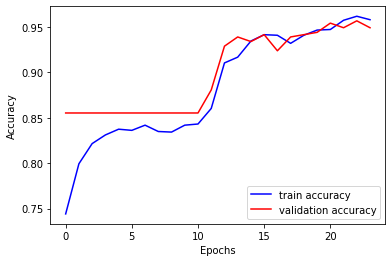

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],c='b',label='train accuracy')
plt.plot(hist.history['val_accuracy'],c='r',label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()